# 線形回帰スクラッチ
線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。

### 雛形

In [1]:
# class ScratchLinearRegression():
#     """
#     線形回帰のスクラッチ実装

#     Parameters
#     ----------
#     num_iter : int
#       イテレーション数
#     lr : float
#       学習率
#     no_bias : bool
#       バイアス項を入れない場合はTrue
#     verbose : bool
#       学習過程を出力する場合はTrue

#     Attributes
#     ----------
#     self.coef_ : 次の形のndarray, shape (n_features,)
#       パラメータ
#     self.loss : 次の形のndarray, shape (self.iter,)
#       学習用データに対する損失の記録
#     self.val_loss : 次の形のndarray, shape (self.iter,)
#       検証用データに対する損失の記録

#     """

#     def __init__(self, num_iter, lr, bias, verbose):
#         # ハイパーパラメータを属性として記録
#         self.iter = num_iter # イテレーション数：データセットに含まれるデータが少なくとも1回は学習に用いられるのに必要な学習回数?
#         #バッチサイズが決まれば自動的に決まる数値
#         self.lr = lr #学習率
#         self.bias = bias # モデルと学習データの平均的なズレ?
#         self.verbose = verbose # 途中経過をコンソールに出力するか（初期値：True）?
#         # 損失を記録する配列を用意
#         self.loss = np.zeros(self.iter)
#         self.val_loss = np.zeros(self.iter)

#     def fit(self, X, y, X_val=None, y_val=None):
#         """
#         線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

#         Parameters
#         ----------
#         X : 次の形のndarray, shape (n_samples, n_features)
#             学習用データの特徴量
#         y : 次の形のndarray, shape (n_samples, )
#             学習用データの正解値
#         X_val : 次の形のndarray, shape (n_samples, n_features)
#             検証用データの特徴量
#         y_val : 次の形のndarray, shape (n_samples, )
#             検証用データの正解値
#         """

#         if self.verbose:
#             #verboseをTrueにした際は学習過程を出力
#             print()
#         pass


#     def predict(self, X):
#         """
#         線形回帰を使い推定する。

#         Parameters
#         ----------
#         X : 次の形のndarray, shape (n_samples, n_features)
#             サンプル

#         Returns
#         -------
#             次の形のndarray, shape (n_samples, 1)
#             線形回帰による推定結果
#         """

#         pass
#         return

## 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$x$ : 特徴量ベクトル

$θ$ : パラメータベクトル

$x_{j}$: j番目の特徴量

$θ_{j}$: j番目のパラメータ（重み）

特徴量の数$n$は任意の値に対応できる実装にしてください。

なお、ベクトル形式で表すと以下のようになります。

$$
h_\theta(x) = \theta^T \cdot x.
$$

### 雛形

クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。

In [2]:
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    pass
    return

### 【問題1】解答

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

/Users/FUZZY/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
# データ取得
df = pd.read_csv('../../house-prices-advanced-regression-techniques/train.csv')

X = df['GrLivArea'].values
# X = df[['GrLivArea', 'YearBuilt']].values
# X = df[['1stFlrSF', 'GrLivArea']].values

test = df['SalePrice'].values

In [26]:
# 仮定関数
def _linear_hypothesis(X):
    """
    線形の仮定関数を計算する
 
    Parameters
    ----------
        X : 次の形のndarray, shape (n_samples, n_features)
      
    Returns
    -------
        x = 全行最初の列に値が1の列を追加されたデータX
        w = θ0：yが0の時の接点, θ1,2,3...n:重み, n：特徴量の数
        pred =  線形の仮定関数による推定結果（次の形のndarray, shape (n_samples, 1)）
    
    """
    if X.shape == (X.shape[0], ):
        x = np.insert(X.reshape(-1, 1), 0, 1, axis=1) # 全行最初の列に値が1の列を追加
    else:
        x = np.insert(X, 0, 1, axis=1) # 全行最初の列に値が1の列を追加
    w = np.random.normal(size=(x.shape[1],1))
    hypo = x@w
    return x, w, hypo

x, w, hypo = _linear_hypothesis(X)


In [27]:
hypo.shape, hypo

((1460, 1), array([[4923.25427294],
        [3633.95373549],
        [5141.97489983],
        ...,
        [6736.33315373],
        [3104.41958617],
        [3616.68631757]]))

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$

$α$
 : 学習率

$i$
 : サンプルのインデックス

$j$
 : 特徴量のインデックス

### 雛形

ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。

In [28]:
# def _gradient_descent(self, X, error):
#     """
#     説明を記述

#     """
#     pass

雛形として用意されたメソッドや関数以外でも必要があれば各自作成して完成させてください。雛形を外れても問題ありません。

### 【問題2】解答

In [29]:
# error = hypo - test.reshape(-1, 1)
# z = error.T@x

In [30]:
# def _gradient_descent(X):
#     """
   
#     Parameters
#     ----------
#         a : 学習率=lr
     
#     Returns
#     -------
#         m：サンプル数
#         error：y予測結果 - 実際のyの値
#         wj：最急降下法による重みの更新値を出力（次の形のndarray, shape (n_feature + 1, 1)  ）
#     """
#     a = 0.9
#     m = X.shape[0]
#     error = hypo - test.reshape(-1, 1)
#     wj = w - (a/m*(error.T@x).T)
#     return m, error, wj

# _gradient_descent(X)[2]

In [31]:
# m, error, wj = _gradient_descent(X)
# wj.shape

## 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数$ hθ(x) $の出力が推定結果です。

In [32]:
# def predict(X):
#     """
#     線形回帰を使い推定する。

#     Parameters
#     ----------
#         X : 次の形のndarray, shape (n_samples, n_features)
#             サンプル

#     Returns
#     -------
#         次の形のndarray, shape (n_samples, 1)
#         線形回帰による推定結果
#     """
#     return pred

# predict(X)
                                                                

## 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。

平均二乗誤差は以下の数式で表されます。

$$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$


$m$: 入力されるデータの数

$h_{θ}()$: 仮定関数

$x_(i)$: i番目のサンプルの特徴量ベクトル

$y_(i)$: i番目のサンプルの正解値

なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

### 雛形

In [33]:
# def MSE(y_pred, y):
#     """
#     平均二乗誤差の計算

#     Parameters
#     ----------
    

#     Returns
#     ----------
#     mse : numpy.float
#       平均二乗誤差
#     """
#     pass
#     return mse

### 【問題4】解答

In [34]:
# def mse(y_pred, y):
#         """
#     平均二乗誤差の計算
    
#     Parameters
#     ----------
#         y_pred : 次の形のndarray, shape (n_samples,)
#         推定した値
#         y : 次の形のndarray, shape (n_samples,)
#         正解値
        
        
#     Returns
#     -------
#         mse：平均二乗誤差（mean square error, MSE）, type（numpy.float）
#     """
        
#         mse = 1/X.shape[0]*(np.sum(y_pred.reshape(-1, 1) - y.reshape(-1, 1))**2)
#         return mse

## 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

目的関数（損失関数） $J(θ)$ は次の式です。

$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

$m$: 入力されるデータの数

$hθ()$: 仮定関数

$x(i)$: i番目のサンプルの特徴量ベクトル

$y(i)$: i番目のサンプルの正解値


### 【問題5】解答

**→クラス内に記述**

## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

### 【問題6】解答

In [35]:
class ScratchLinearRegression():
    
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter # イテレーション数：データセットに含まれるデータが少なくとも1回は学習に用いられるのに必要な学習回数?
        #バッチサイズが決まれば自動的に決まる数値
        self.lr = lr #学習率
        self.bias = bias # モデルと学習データの平均的なズレ?
        self.verbose = verbose # 途中経過をコンソールに出力するか（初期値：True）?
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        # 傾き
        self.coef_ = None

# 仮定関数
    def _linear_hypothesis(self, X):
        
        """
        線形の仮定関数を計算する

        Parameters
        ----------
            X : 次の形のndarray, shape (n_samples, n_features)

        Returns
        -------
            x = 全行最初の列に値が1の列を追加されたデータX
            w = θ0：yが0の時の接点, θ1,2,3...n:重み, n：特徴量の数
            hypo =  線形の仮定関数による推定結果（次の形のndarray, shape (n_samples, 1)）

        """   
        self.hypo = X@self.coef_
        return self.hypo
      
        
#  最急降下法
    def _gradient_descent(self, X, error):
        """
        self.coef_更新
            
        Parameters
        ----------
            a : 学習率=lr

        Returns
        -------
            coef_：shape (n_feature + 1, 1)

        """
        self.coef_ = self.coef_ - self.lr*(error.T@X).T/X.shape[0]

        
# 目的関数（損失関数）
    def cost_func(self, X, y, X_val=None, y_val=None):
        self.loss = 1/(2*X.shape[0])*np.sum((self.error)**2)
        # X_val,y_val分岐
        if X_val is not None and y_val is not None:
            X_val = X_val.reshape(-1, X_val.shape[1])
            self.val_loss = 1/(2*X_val.shape[0])*np.sum((self.error)**2)
        else:
            pass

        
# Fit関数  
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        # X shape処理
        X = X.reshape(-1, X.shape[1])
                    
        # バイアス分岐 
        # True
        if self.bias: 
            X = np.insert(X, 0, 1, axis=1)
            self.coef_ = np.random.normal(size=(X.shape[1],1)) # coef(仮定関数の重み)の初期値を設定
            self.count_iter = []
            self.count = 0
            self.loss_list = []
            self.val_loss_list = []
            for i in range(self.iter):
                self.count +=1
                self.count_iter.append(self.count)
                # 仮定関数を実行し予測を更新
                hypo = self._linear_hypothesis(X)
                # 誤差を更新
                self.error = hypo - y.reshape(-1, 1)
                # 最急降下法による重みの更新
                self._gradient_descent(X, self.error)
                self.cost_func(X, y, X_val, y_val) 
                self.loss_list.append(self.loss)
                self.val_loss_list.append(self.val_loss)
                #verboseをTrueにした際は学習過程を出力
                if self.verbose == True:
                    print("{}回目の学習".format(i+1))
                   
        # False
        else: 
            self.coef_ = np.random.normal(size=(X.shape[1],1)) # coef(仮定関数の重み)の初期値を設定
            self.count_iter = []
            self.count = 0
            self.loss_list = []
            self.val_loss_list = []
            for i in range(self.iter):
                self.count +=1
                self.count_iter.append(self.count)
                # 仮定関数を実行し予測を更新
                hypo = self._linear_hypothesis(X)
                # 誤差を更新
                self.error = hypo - y.reshape(-1, 1)
                # 最急降下法による重みの更新
                self._gradient_descent(X, self.error)
                self.cost_func(X, y, X_val, y_val) 
                self.loss_list.append(self.loss)
                self.val_loss_list.append(self.val_loss)
                #verboseをTrueにした際は学習過程を出力
                if self.verbose == True:
                    print("{}回目の学習".format(i+1))

        
    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        predict = X@self.coef_    
        return predict

In [36]:
std = StandardScaler()
if X.ndim > 1:
    X = std.fit_transform(X.reshape(-1, X.shape[1]))
    test = std.fit_transform(test.reshape(-1, 1))
else:
    X = std.fit_transform(X.reshape(-1, 1))
    test = std.fit_transform(test.reshape(-1, 1))
X.shape

(1460, 1)

In [37]:
# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, test, test_size=0.2, random_state=42)

In [50]:
param = {'num_iter':3000, 'lr':0.01, 'bias':True, 'verbose':False}
model = ScratchLinearRegression(**param)

param_fit = {'X':X_train, 'y':y_train, 'X_val':X_test, 'y_val':y_test}
model.fit(**param_fit)
# y_pred = model.predict(X_test)
model.coef_.shape

(2, 1)

In [51]:
# mse(y_pred, y_test)
# mean_squared_error(y_pred, y_test)

#### scikit-learnによる実装との比較

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 1), (292, 1), (1168, 1), (292, 1))

In [53]:
model_sklearn = LinearRegression()

model_sklearn.fit(X_train, y_train)
model_sklearn_pred = model_sklearn.predict(X_test)

mean_squared_error(y_test, model_sklearn_pred)


0.5421057428693639

## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

**プロット例**

![](https://t.gyazo.com/teams/diveintocode/7977285221cd69d278434721fbe406e3.png)

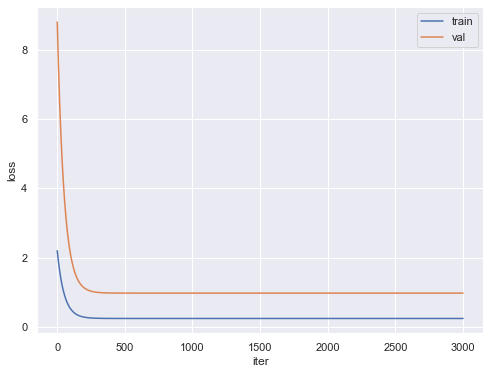

In [54]:
plt.figure(figsize=(8,6))
sns.set()
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(model.count_iter, model.loss_list, label='train')
plt.plot(model.count_iter, model.val_loss_list, label='val')
plt.legend()